# EPIC
# Ireland Greenhouse Gas Emmisions

---
# Setup

In [11]:
import numpy as np
import pandas as pd


---
# Preprocessing

## EV Sales

In [21]:
from pandas import read_csv

# Read from the csv file
ev_sales = read_csv('data/ev_sales.csv')
# Extract the year from the list of months
# This is formatted as 2020M01, 2020M02 etc.
ev_sales['Year'] = ev_sales['Month'].str[:4]
# Aggregate the values into one value per year
ev_sales = ev_sales.groupby(['Year'])['VALUE'].sum().reset_index().astype({'Year': 'int64'})
ev_sales

,Year,VALUE
0,2013,87
1,2014,263
2,2015,497
3,2016,411
4,2017,664
5,2018,1328
6,2019,3803
7,2020,4443
8,2021,9616
9,2022,16268


## Fill past values for EV Sales

In [22]:
# Fill the table with zeros
zeros = [[year, 0] for year in range(1990, 2013)]
zeros = pd.DataFrame(zeros, columns=['Year', 'VALUE'])
ev_sales = pd.concat([zeros, ev_sales], ignore_index=True)
ev_sales

,Year,VALUE
0,1990,0
1,1991,0
2,1992,0
3,1993,0
4,1994,0
5,1995,0
6,1996,0
7,1997,0
8,1998,0
9,1999,0


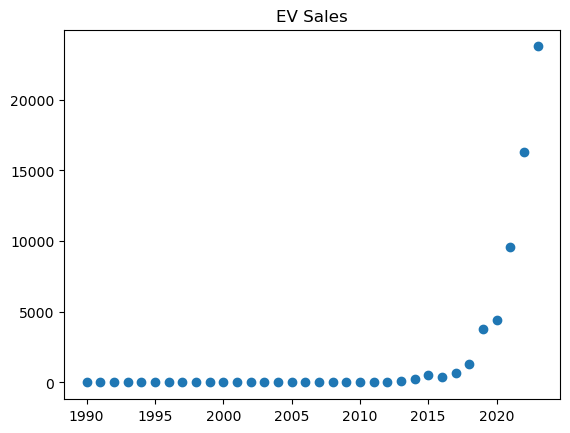

In [25]:
from matplotlib import pyplot as plt

plt.scatter(ev_sales['Year'], ev_sales['VALUE'])
plt.title('EV Sales')
plt.show()

In [15]:
# Remove years past 2019 for analysis
ev_sales = ev_sales[ev_sales['Year'] < 2020]

## CO2

In [16]:
# Read csv
co2 = read_csv('data/CO2-Emissions.csv')
# Extract the relevant years from the Ireland entry
co2 = co2[co2['Country Code'] == 'IRL'].iloc[:, 34:-4]
# Convert to a column from a row
co2 = co2.transpose().reset_index()
# Rename the columns and reset datatypes
co2.columns = ['Year', 'Value']
co2 = co2.astype({'Year': 'int64'})
co2

,Year,Value
0,1990,8.810964
1,1991,8.903398
2,1992,8.853736
3,1993,8.851032
4,1994,9.140716
5,1995,9.268405
6,1996,9.572812
7,1997,9.790644
8,1998,10.348006
9,1999,10.645960


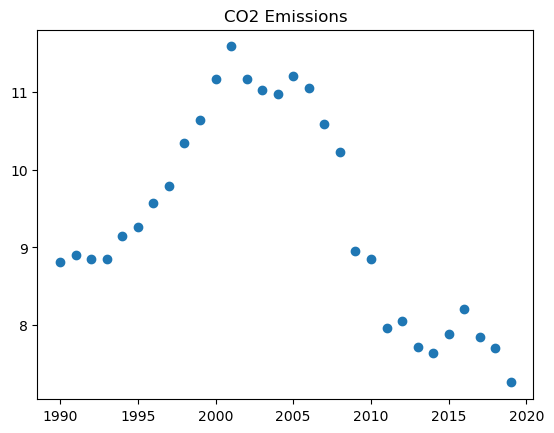

In [17]:
plt.scatter(co2['Year'], co2['Value'])
plt.title('CO2 Emissions')

plt.show()

In [18]:
df = pd.merge(ev_sales, co2, on='Year', how='outer')
df.columns = ['Year', 'EV Sales', 'CO2 Emissions']
df

,Year,EV Sales,CO2 Emissions
0,1990,0,8.810964
1,1991,0,8.903398
2,1992,0,8.853736
3,1993,0,8.851032
4,1994,0,9.140716
5,1995,0,9.268405
6,1996,0,9.572812
7,1997,0,9.790644
8,1998,0,10.348006
9,1999,0,10.645960


# Merge Tables

In [19]:
trees = read_csv('data/Forest_Cover.csv')
df = (pd.merge(ev_sales, trees, on='Year'))
df.columns = ['Year', 'EV Sales', 'Forest Cover %']
df

,Year,EV Sales,Forest Cover %
0,1990,0,6.900000
1,1991,0,7.100000
2,1992,0,7.300000
3,1993,0,7.500000
4,1994,0,7.700000
5,1995,0,7.900000
6,1996,0,8.100000
7,1997,0,8.300000
8,1998,0,8.500000
9,1999,0,8.700000


KeyError: 'VALUE'

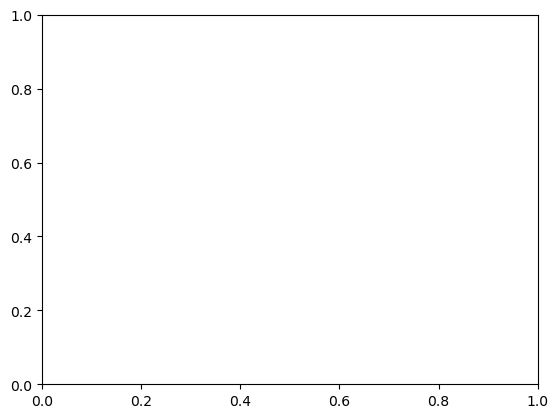

In [20]:
fig, ax1 = plt.subplots()
ax1.plot(df['Year'], df['VALUE'])
ax1.set_xlabel('Year')
ax1.set_ylabel('EV Sales')
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Percentage Forest Cover'], color='tab:green')
ax2.set_ylabel('Coverage %')
plt.title('EV Sales and Forest Cover')
plt.show()

# Renewable Energy

In [29]:
# Read csv
Renewable = read_csv('data/Renewable-Energy.csv')
# Isolate the data for Ireland for the selected years
Renewable = Renewable[Renewable['Country Code'] == 'IRL'].iloc[:, 34:-4]
# Convert to a column from a row
Renewable = Renewable.transpose().reset_index()
# Rename the columns and reset datatypes
Renewable.columns = ['Year', 'Value']
Renewable = Renewable.astype({'Year': 'int64'})
Renewable

,Year,Value
0,1990,2.28
1,1991,2.23
2,1992,2.17
3,1993,2.11
4,1994,2.18
5,1995,1.93
6,1996,1.95
7,1997,1.91
8,1998,2.30
9,1999,2.08


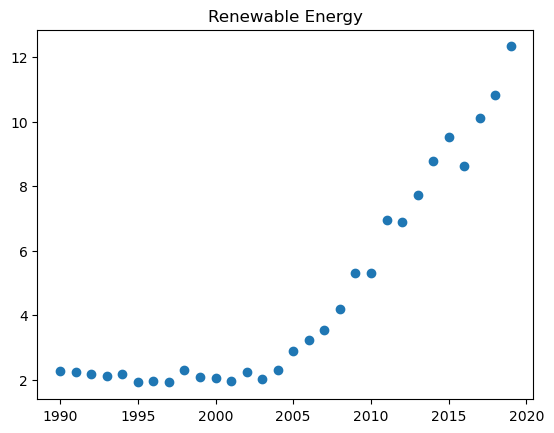

In [30]:
plt.scatter(Renewable['Year'], Renewable['Value'])
plt.title('Renewable Energy')

plt.show()